# Análisis de Regresión Lineal y Correlación (Datos Corregidos)
En este notebook se abordarán los siguientes temas relacionados con la regresión lineal y correlación:
- Coeficiente de Correlación.
- Coeficiente de Determinación.
- Trazo de la Recta de Regresión (Mínimos Cuadrados).
- Error Estándar de Estimación.

Se procesan las columnas necesarias para convertirlas a datos numéricos antes de realizar los análisis.

## 1. Carga y Procesamiento de Datos
### Carga y limpieza de datos
Se cargan los datos desde el archivo proporcionado y se procesan las columnas necesarias para convertirlas a datos numéricos.

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Cargar los datos
file_path = 'Respuestas.xlsx'
sheet_name = 'Respuestas de formulario 1'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Convertir columnas relevantes a datos numéricos
conversion_dict = {
    'Nada': 1,
    'Básico': 2,
    'Intermedio': 3,
    'Avanzado': 4,
    'Experto': 5
}
df['Nivel_IA'] = df['¿Cuál es tu nivel de conocimiento sobre Inteligencia Artificial (IA)? '].map(conversion_dict)

df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')  # Asegurar que Edad sea numérica
df = df.dropna(subset=['Edad', 'Nivel_IA'])  # Eliminar filas con datos faltantes
df.head()  # Vista previa de los datos procesados

,Marca temporal,Edad,Genero,Carrera,¿Cuál es tu nivel de conocimiento sobre Blockchain?,¿Cuál es tu nivel de conocimiento sobre Criptomonedas?,¿Cuál es tu nivel de conocimiento sobre Inteligencia Artificial (IA)?,¿Cuál es tu nivel de conocimiento sobre Machine Learning (ML)?,¿Conoces las aplicaciones de Blockchain en sistemas computacionales?,¿Qué tan actualizado(a) te consideras en las nuevas tecnologías de sistemas computacionales?,...,¿Consideras que el Blockchain es una tecnología útil para la ciberseguridad?,¿Te gustaría que se incluyeran temas sobre Blockchain en los cursos universitarios?,¿Consideras que el uso de Blockchain puede mejorar la transparencia en los sistemas computacionales?,¿Qué tan familiarizado(a) estás con los conceptos de IA?,¿Qué tan familiarizado(a) estás con los conceptos de ML?,¿Consideras que los conocimientos en IA son relevantes para tu futuro profesional?,¿Consideras que los conocimientos en ML son relevantes para tu futuro profesional?,¿Qué tan difícil consideras el aprendizaje de IA y ML?,¿Crees que IA y ML revolucionarán los sistemas computacionales en los próximos años?,Nivel_IA
0,2024-11-16 01:50:40.292,20,Hombre,Licenciatura en Desarrollo y Gestión del Software,Básico,Básico,Intermedio,Intermedio,Poco,Poco,...,No estoy seguro(a),Sí,Sí,Muy familiarizado(a),Bastante,Muy relevantes,Muy relevantes,Bastante difícil,Es práctimente seguro,3.0
1,2024-11-16 02:05:34.528,21,Hombre,Licenciatura en Desarrollo de Software,Ninguno,Ninguno,Básico,Básico,No,Poco,...,No estoy seguro(a),No,No estoy seguro(a),Poco,Poco,Algo relevantes,Algo relevantes,Bastante difícil,Algo probable,2.0
2,2024-11-16 02:11:10.320,20,Hombre,Licenciatura en Redes Informáticas,Básico,Básico,Básico,Básico,No,Bastante,...,Sí,Sí,Sí,Muy familiarizado(a),Bastante,Algo relevantes,Nada relevantes,Muy difícil,Muy probable,2.0
3,2024-11-16 10:12:41.885,20,Hombre,Licenciatura en Desarrollo de Software,Básico,Básico,Avanzado,Intermedio,Poco,Muy actualizado(a),...,No estoy seguro(a),Sí,Sí,Muy familiarizado(a),Poco,Muy relevantes,Muy relevantes,Poco difícil,Es práctimente seguro,4.0
4,2024-11-16 10:44:29.661,32,Hombre,Licenciatura en Desarrollo de Software,Avanzado,Avanzado,Intermedio,Intermedio,Mucho,Bastante,...,Sí,Sí,No,Bastante,Poco,Bastante relevantes,Bastante relevantes,Nada difícil,Muy probable,3.0


## 2. Coeficiente de Correlación
### Definición:
El coeficiente de correlación (\( r \)) mide la intensidad y dirección de la relación lineal entre dos variables.
- Valores cercanos a +1 indican una relación lineal positiva fuerte.
- Valores cercanos a -1 indican una relación lineal negativa fuerte.
- Valores cercanos a 0 indican poca o ninguna relación lineal.

**Ejemplo:** Relación entre 'Edad' y el nivel de conocimiento sobre IA.

In [2]:
# Calcular el coeficiente de correlación
correlacion = df['Edad'].corr(df['Nivel_IA'])
print(f'Coeficiente de Correlación (r): {correlacion:.2f}')

Coeficiente de Correlación (r): 0.24


## 3. Coeficiente de Determinación
### Definición:
El coeficiente de determinación (\( R^2 \)) mide la proporción de la variabilidad en la variable dependiente que puede ser explicada por la variable independiente en el modelo de regresión lineal.

**Ejemplo:** Relación entre 'Edad' y el nivel de conocimiento sobre IA.

In [3]:
# Calcular el coeficiente de determinación
X = df[['Edad']]
y = df['Nivel_IA']

model = LinearRegression()
model.fit(X, y)

r_squared = model.score(X, y)
print(f'Coeficiente de Determinación (R^2): {r_squared:.2f}')

Coeficiente de Determinación (R^2): 0.06


## 4. Trazo de la Recta de Regresión (Mínimos Cuadrados)
### Definición:
El método de mínimos cuadrados se utiliza para calcular la ecuación de la recta de regresión lineal.
Esta recta minimiza la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo.

**Ejemplo:** Trazar la recta de regresión para 'Edad' como variable independiente y el nivel de conocimiento sobre IA como dependiente.

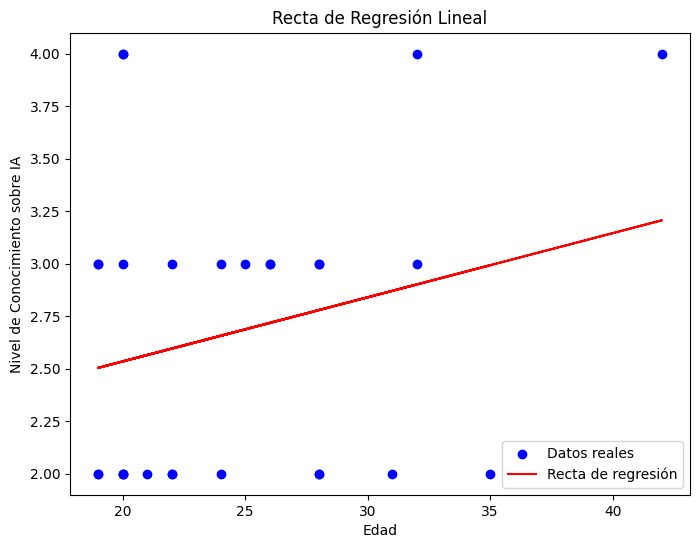

In [4]:
# Ajustar y graficar la recta de regresión
y_pred = model.predict(X)

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Recta de regresión')
plt.title('Recta de Regresión Lineal')
plt.xlabel('Edad')
plt.ylabel('Nivel de Conocimiento sobre IA')
plt.legend()
plt.show()

## 5. Error Estándar de Estimación
### Definición:
El error estándar de estimación mide la precisión de las predicciones realizadas por el modelo de regresión. Un valor bajo indica que el modelo ajusta bien los datos.

**Ejemplo:** Calcular el error estándar de estimación para el modelo ajustado previamente.

In [5]:
# Calcular el error estándar de estimación
residuals = y - y_pred
error_estandar = (np.sum(residuals**2) / (len(y) - 2))**0.5
print(f'Error Estándar de Estimación: {error_estandar:.2f}')

Error Estándar de Estimación: 0.71
